# **Data Preparation**

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('/content/4A_TB_cleaned.xlsx')

In [3]:
data.shape

(16368, 18)

In [4]:
data = pd.concat([data] * 4, ignore_index=True)

In [5]:
data.shape

(65472, 18)

In [6]:
data.head()

,UNIT,IP NUMBER,SEX,AGE,RELIGION,DISTRICT OF RESIDENCE,WORKING DIAGNOSIS,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,MARITAL STATUS,MONTH OF ADMISSION,DAY OF ADMISSION,YEAR OF ADMISSION,DURATION,REGION,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS
0,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
1,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
2,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
3,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
4,GI,1868011,F,46,COU,Kampala,"ISS Stage I&II,Disseminated TB,,",IMPROVED,3,Disseminated TB,2,December,Monday,2010,4,CENTRAL,"ISS Stage I&II,,",1


In [7]:
data['SEX'].value_counts()

SEX
M    33088
F    32384
Name: count, dtype: int64

In [8]:
# Converting duration to whole weeks (assuming 7 days per week)
data['Duration (weeks)'] = data['DURATION'].apply(lambda x: int(x // 7 + (x % 7 > 0)))
data['WEEK'] = [1, 2, 3, 4] * (len(data) // 4)

In [9]:
data.head()

,UNIT,IP NUMBER,SEX,AGE,RELIGION,DISTRICT OF RESIDENCE,WORKING DIAGNOSIS,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,MARITAL STATUS,MONTH OF ADMISSION,DAY OF ADMISSION,YEAR OF ADMISSION,DURATION,REGION,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,Duration (weeks),WEEK
0,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1,1,1
1,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1,1,2
2,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1,1,3
3,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1,1,4
4,GI,1868011,F,46,COU,Kampala,"ISS Stage I&II,Disseminated TB,,",IMPROVED,3,Disseminated TB,2,December,Monday,2010,4,CENTRAL,"ISS Stage I&II,,",1,1,1


In [10]:
# function to calculate the survival status
def calculate_survival_status(row):
    if row['OUT COME'] == 'DIED':
        return 1 if row['WEEK'] >= row['Duration (weeks)'] else 0
    else:
        return 0 if row['WEEK'] <= row['Duration (weeks)'] else None


data['SURVIVAL'] = data.apply(calculate_survival_status, axis=1)



In [11]:
data.head()

,UNIT,IP NUMBER,SEX,AGE,RELIGION,DISTRICT OF RESIDENCE,WORKING DIAGNOSIS,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,...,MONTH OF ADMISSION,DAY OF ADMISSION,YEAR OF ADMISSION,DURATION,REGION,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,Duration (weeks),WEEK,SURVIVAL
0,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,...,November,Tuesday,2010,6,CENTRAL,"ISS,,",1,1,1,0.0
1,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,...,November,Tuesday,2010,6,CENTRAL,"ISS,,",1,1,2,NaN
2,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,...,November,Tuesday,2010,6,CENTRAL,"ISS,,",1,1,3,NaN
3,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,...,November,Tuesday,2010,6,CENTRAL,"ISS,,",1,1,4,NaN
4,GI,1868011,F,46,COU,Kampala,"ISS Stage I&II,Disseminated TB,,",IMPROVED,3,Disseminated TB,...,December,Monday,2010,4,CENTRAL,"ISS Stage I&II,,",1,1,1,0.0


In [12]:
data.drop(columns=['UNIT','DISTRICT OF RESIDENCE','WORKING DIAGNOSIS','ADDITIONAL WORKING DIAGNOSIS',
                   'MARITAL STATUS', 'IP NUMBER', 'OUT COME', 'Duration (weeks)'], inplace=True)



new_col_order = ['SEX', 'AGE', 'RELIGION', 'REGION', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS', 'TB_type',
                 'NUMBER OF PREVIOUS ADMISSIONS', 'DAY OF ADMISSION', 'MONTH OF ADMISSION',
                 'YEAR OF ADMISSION', 'DURATION', 'SURVIVAL', 'WEEK']
data = data[new_col_order]

In [13]:
data.head()

,SEX,AGE,RELIGION,REGION,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,TB_type,NUMBER OF PREVIOUS ADMISSIONS,DAY OF ADMISSION,MONTH OF ADMISSION,YEAR OF ADMISSION,DURATION,SURVIVAL,WEEK
0,M,30,COU,CENTRAL,1,Abdominal_TB,5,Tuesday,November,2010,6,0.0,1
1,M,30,COU,CENTRAL,1,Abdominal_TB,5,Tuesday,November,2010,6,NaN,2
2,M,30,COU,CENTRAL,1,Abdominal_TB,5,Tuesday,November,2010,6,NaN,3
3,M,30,COU,CENTRAL,1,Abdominal_TB,5,Tuesday,November,2010,6,NaN,4
4,F,46,COU,CENTRAL,1,Disseminated TB,3,Monday,December,2010,4,0.0,1


In [14]:
data.dropna(subset=['SURVIVAL'], inplace=True)
data.reset_index(drop=True, inplace=True)
data['SURVIVAL'] = data['SURVIVAL'].astype(int)

In [15]:
data.shape

(39064, 13)

#**Preprocessing**

In [16]:
# dictionary for month encoding
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# dictionary for day of week encoding
day_mapping = {'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday':76 }

data['Month of Admission'] = data['MONTH OF ADMISSION'].map(month_mapping)
data['Day of Admission'] = data['DAY OF ADMISSION'].map(day_mapping)

data.drop(columns=['MONTH OF ADMISSION', 'DAY OF ADMISSION'], inplace=True)

In [17]:
categorical_features = ['SEX', 'RELIGION', 'REGION', 'TB_type']

dataset = pd.get_dummies(data, columns=categorical_features)
dataset = dataset.astype(int)
dataset.head()

,AGE,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,NUMBER OF PREVIOUS ADMISSIONS,YEAR OF ADMISSION,DURATION,SURVIVAL,WEEK,Month of Admission,Day of Admission,SEX_F,...,REGION_EASTERN,REGION_NORTHERN,REGION_UNKNOWN,REGION_WESTERN,TB_type_Abdominal_TB,TB_type_CNS_TB,TB_type_Disseminated TB,TB_type_Other TBs,TB_type_PTB,TB_type_TB iris
0,30,1,5,2010,6,0,1,11,3,0,...,0,0,0,0,1,0,0,0,0,0
1,46,1,3,2010,4,0,1,12,2,1,...,0,0,0,0,0,0,1,0,0,0
2,80,2,7,2010,8,0,1,12,4,0,...,0,0,0,0,1,0,0,0,0,0
3,80,2,7,2010,8,0,2,12,4,0,...,0,0,0,0,1,0,0,0,0,0
4,22,0,8,2010,9,0,1,12,2,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
dataset.head(20)

,AGE,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,NUMBER OF PREVIOUS ADMISSIONS,YEAR OF ADMISSION,DURATION,SURVIVAL,WEEK,Month of Admission,Day of Admission,SEX_F,...,REGION_EASTERN,REGION_NORTHERN,REGION_UNKNOWN,REGION_WESTERN,TB_type_Abdominal_TB,TB_type_CNS_TB,TB_type_Disseminated TB,TB_type_Other TBs,TB_type_PTB,TB_type_TB iris
0,30,1,5,2010,6,0,1,11,3,0,...,0,0,0,0,1,0,0,0,0,0
1,46,1,3,2010,4,0,1,12,2,1,...,0,0,0,0,0,0,1,0,0,0
2,80,2,7,2010,8,0,1,12,4,0,...,0,0,0,0,1,0,0,0,0,0
3,80,2,7,2010,8,0,2,12,4,0,...,0,0,0,0,1,0,0,0,0,0
4,22,0,8,2010,9,0,1,12,2,0,...,0,0,0,0,1,0,0,0,0,0
5,22,0,8,2010,9,0,2,12,2,0,...,0,0,0,0,1,0,0,0,0,0
6,18,0,4,2011,5,0,1,1,5,1,...,0,0,0,0,0,0,0,0,1,0
7,24,1,2,2011,3,1,1,1,4,1,...,0,0,0,0,0,0,1,0,0,0
8,24,1,2,2011,3,1,2,1,4,1,...,0,0,0,0,0,0,1,0,0,0
9,24,1,2,2011,3,1,3,1,4,1,...,0,0,0,0,0,0,1,0,0,0


In [19]:
from sklearn.preprocessing import StandardScaler

#Standardizing continuous features
standardize_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS', 'YEAR OF ADMISSION', 'DURATION', 'Month of Admission', 'Day of Admission']
scaler = StandardScaler()
dataset[standardize_features] = scaler.fit_transform(dataset[standardize_features])

In [20]:
dataset.head(20)

,AGE,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,NUMBER OF PREVIOUS ADMISSIONS,YEAR OF ADMISSION,DURATION,SURVIVAL,WEEK,Month of Admission,Day of Admission,SEX_F,...,REGION_EASTERN,REGION_NORTHERN,REGION_UNKNOWN,REGION_WESTERN,TB_type_Abdominal_TB,TB_type_CNS_TB,TB_type_Disseminated TB,TB_type_Other TBs,TB_type_PTB,TB_type_TB iris
0,-0.499157,-0.768999,0.671691,-1.980754,-0.376849,0,1,1.316377,-0.363370,0,...,0,0,0,0,1,0,0,0,0,0
1,0.973860,-0.768999,0.263214,-1.980754,-0.588397,0,1,1.607375,-0.409039,1,...,0,0,0,0,0,0,1,0,0,0
2,4.104020,0.514769,1.080168,-1.980754,-0.165300,0,1,1.607375,-0.317701,0,...,0,0,0,0,1,0,0,0,0,0
3,4.104020,0.514769,1.080168,-1.980754,-0.165300,0,2,1.607375,-0.317701,0,...,0,0,0,0,1,0,0,0,0,0
4,-1.235665,-2.052767,1.284406,-1.980754,-0.059526,0,1,1.607375,-0.409039,0,...,0,0,0,0,1,0,0,0,0,0
5,-1.235665,-2.052767,1.284406,-1.980754,-0.059526,0,2,1.607375,-0.409039,0,...,0,0,0,0,1,0,0,0,0,0
6,-1.603919,-2.052767,0.467452,-1.570331,-0.482623,0,1,-1.593609,-0.272032,1,...,0,0,0,0,0,0,0,0,1,0
7,-1.051538,-0.768999,0.058975,-1.570331,-0.694171,1,1,-1.593609,-0.317701,1,...,0,0,0,0,0,0,1,0,0,0
8,-1.051538,-0.768999,0.058975,-1.570331,-0.694171,1,2,-1.593609,-0.317701,1,...,0,0,0,0,0,0,1,0,0,0
9,-1.051538,-0.768999,0.058975,-1.570331,-0.694171,1,3,-1.593609,-0.317701,1,...,0,0,0,0,0,0,1,0,0,0


In [21]:
dataset['SURVIVAL'].value_counts()

SURVIVAL
0    20864
1    18200
Name: count, dtype: int64

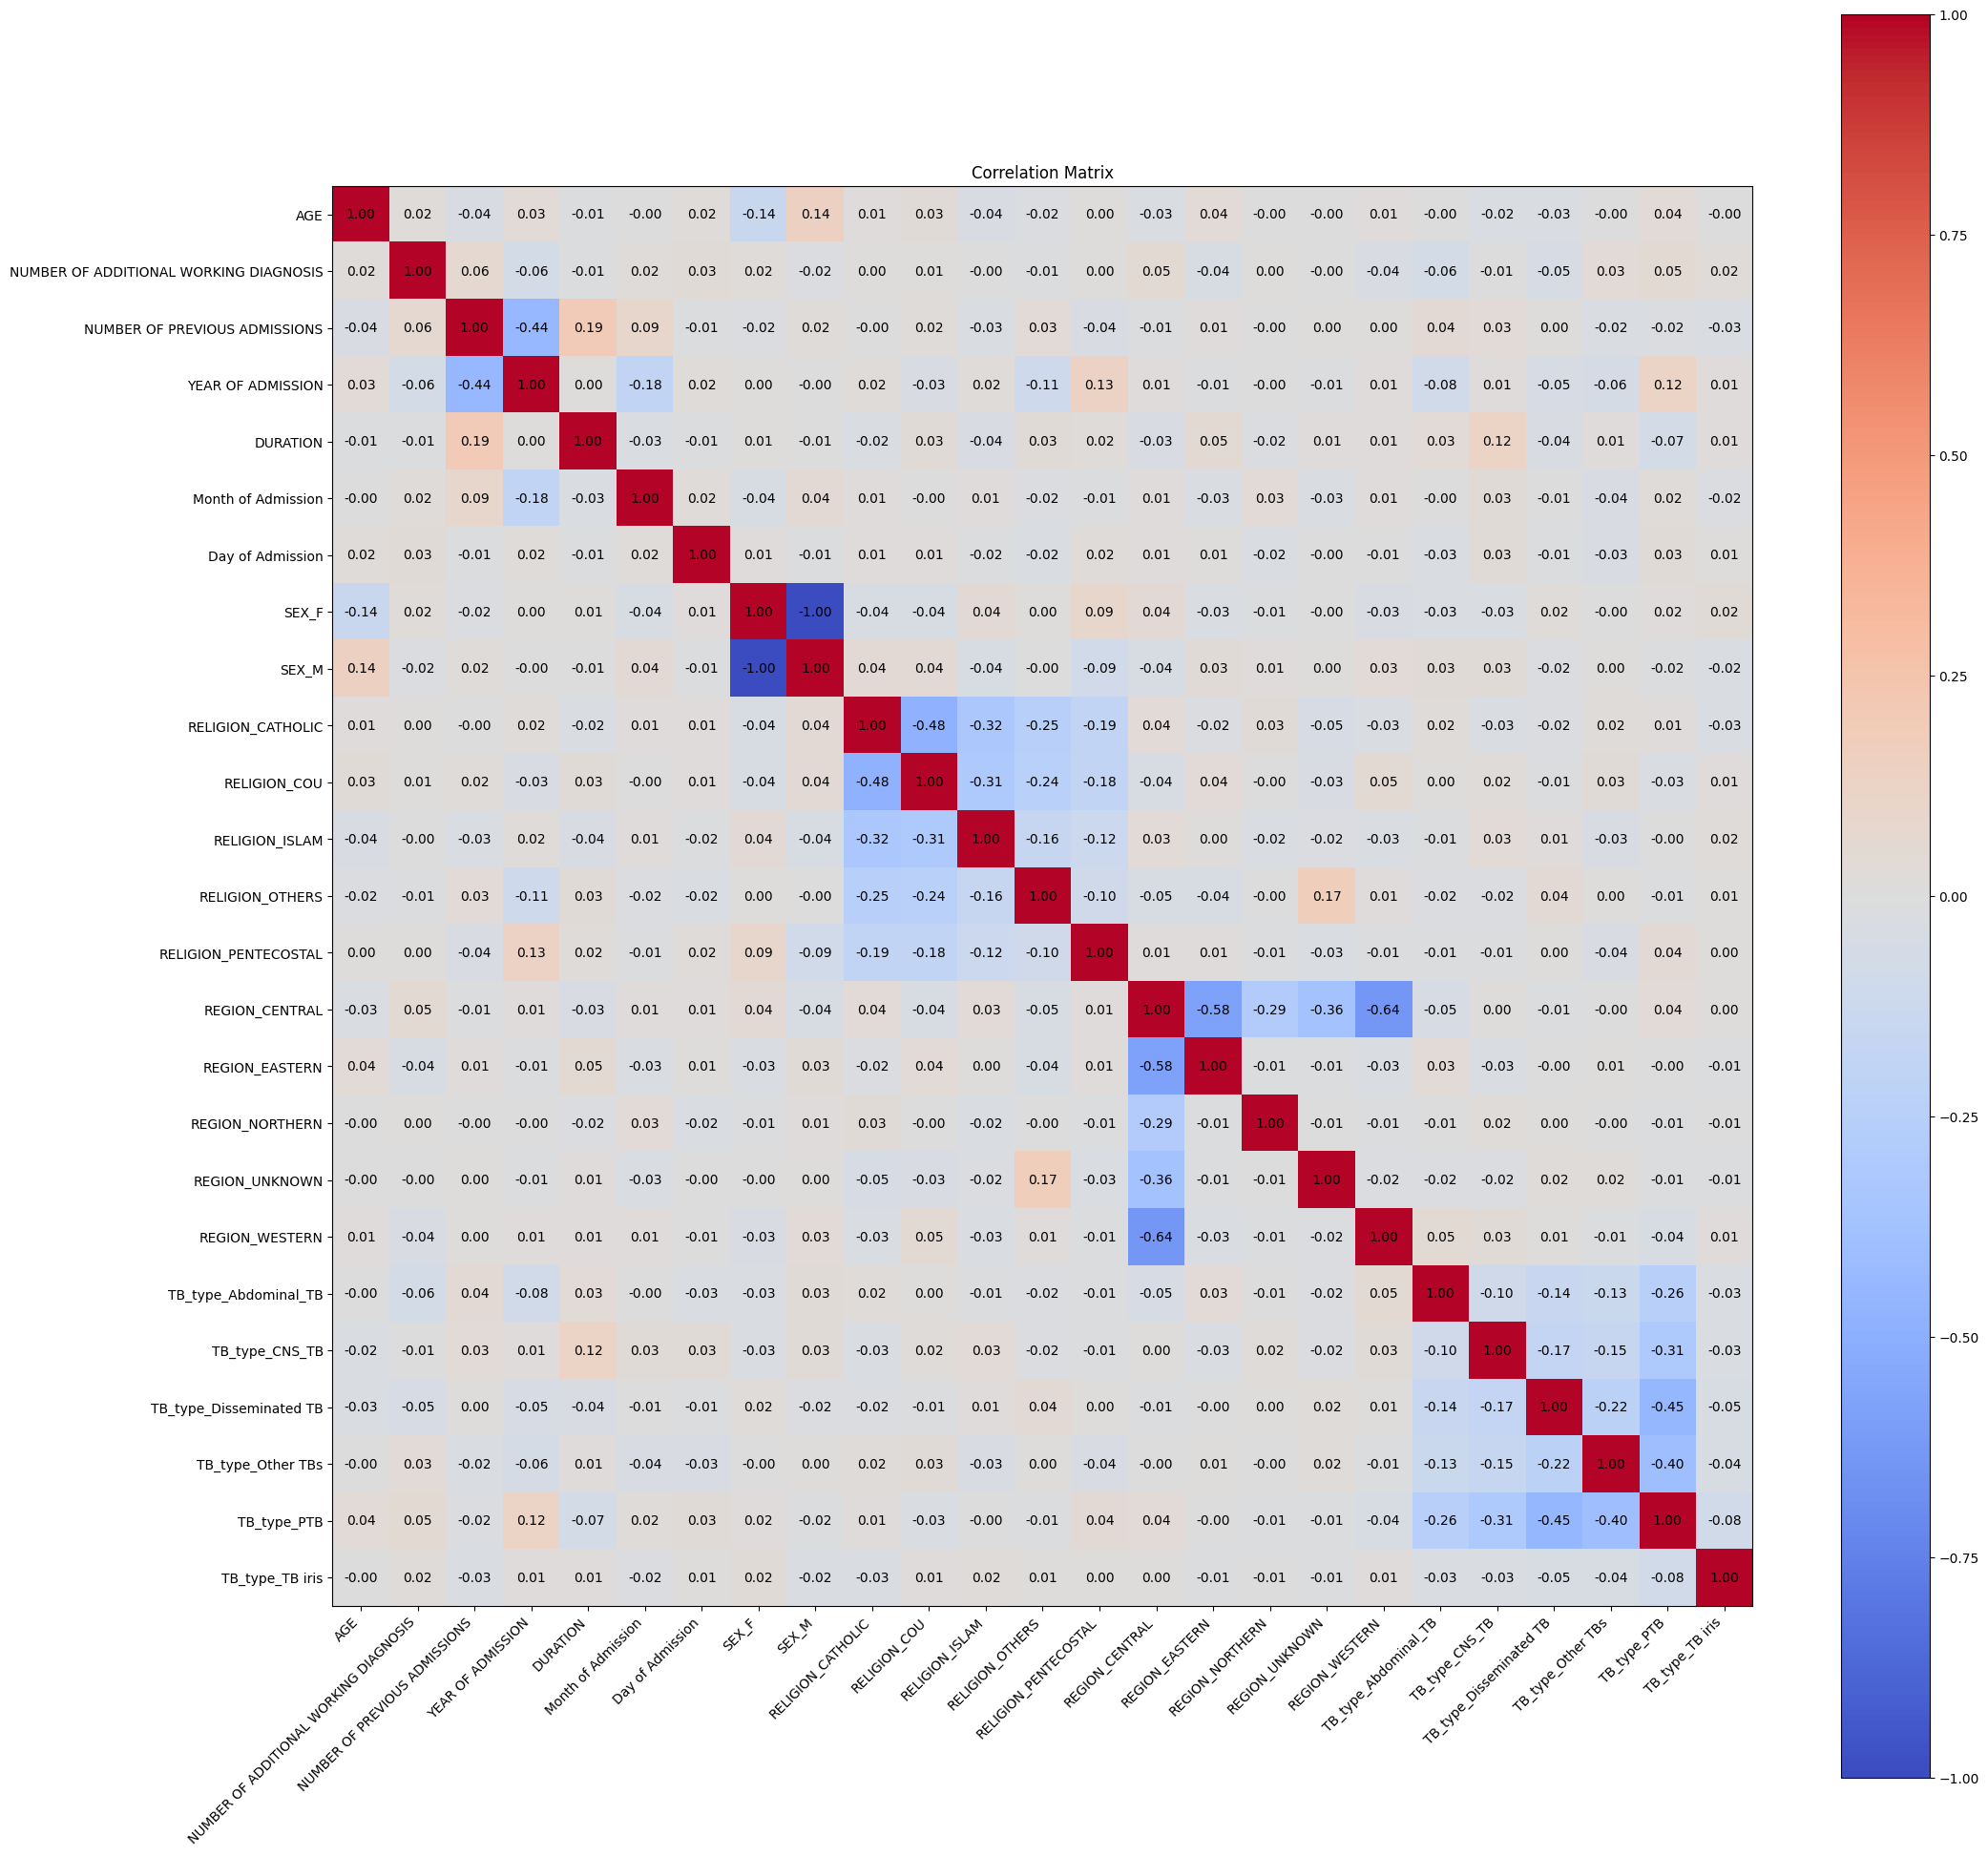

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
columns = ['AGE', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS',
           'NUMBER OF PREVIOUS ADMISSIONS','YEAR OF ADMISSION' ,'DURATION', 'Month of Admission', 'Day of Admission',
           'SEX_F', 'SEX_M', 'RELIGION_CATHOLIC', 'RELIGION_COU', 'RELIGION_ISLAM', 'RELIGION_OTHERS',
           'RELIGION_PENTECOSTAL', 'REGION_CENTRAL', 'REGION_EASTERN', 'REGION_NORTHERN', 'REGION_UNKNOWN',
           'REGION_WESTERN', 'TB_type_Abdominal_TB', 'TB_type_CNS_TB', 'TB_type_Disseminated TB',
           'TB_type_Other TBs', 'TB_type_PTB', 'TB_type_TB iris']
correlation_matrix = dataset[columns].corr()

plt.figure(figsize=(24, 24))
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()

for i in range(len(columns)):
    for j in range(len(columns)):
        plt.text(i, j, "{:.2f}".format(correlation_matrix.iloc[i, j]), ha='center', va='center')

plt.xticks(range(len(columns)), columns, rotation=45, ha='right')
plt.yticks(range(len(columns)), columns)
plt.title('Correlation Matrix')
plt.show()

# **Training**

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [24]:

# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Convert to TensorFlow datasets
def to_tf_dataset(data, features, target, task_col, batch_size=32):
    def generator():
        for _, row in data.iterrows():
            x = row[features].values.astype(np.float32)
            y = row[target].astype(np.float32)
            task = row[task_col].astype(np.int32) - 1
            yield x, y, task

    output_signature = (
        tf.TensorSpec(shape=(len(features),), dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.int32)
    )

    return tf.data.Dataset.from_generator(generator, output_signature=output_signature).batch(batch_size).shuffle(buffer_size=1024)

features = [col for col in dataset.columns if col not in ['SURVIVAL', 'WEEK']]
target = 'SURVIVAL'
task_col = 'WEEK'

train_dataset = to_tf_dataset(train_data, features, target, task_col)
val_dataset = to_tf_dataset(val_data, features, target, task_col)
test_dataset = to_tf_dataset(test_data, features, target, task_col)


In [25]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def create_multitask_model(input_shape, num_tasks):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.Dense(64, activation='relu')(x)

    # Create separate outputs for each task
    outputs = [layers.Dense(1, activation='sigmoid', name=f'task_{i+1}')(x) for i in range(num_tasks)]

    model = Model(inputs=inputs, outputs=outputs)
    return model


In [26]:
def multitask_temporal_loss(y_true, y_pred, task_indices, model):
    loss = 0
    lambda_smooth = 0.1  # smoothness constraint coefficient
    for i in range(len(model.outputs)):
        task_mask = (task_indices == i)
        if tf.reduce_sum(tf.cast(task_mask, tf.float32)) > 0:
            task_loss = tf.keras.losses.binary_crossentropy(y_true[task_mask], y_pred[i][task_mask])
            loss += tf.reduce_mean(task_loss)

            # Smoothness constraint (L2 norm of the differences between consecutive outputs)
            if i > 0:
                diff = y_pred[i] - y_pred[i-1]
                smoothness_loss = lambda_smooth * tf.reduce_mean(tf.square(diff))
                loss += smoothness_loss
    return loss


In [27]:
class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, val_data, num_tasks):
        super().__init__()
        self.val_data = val_data
        self.num_tasks = num_tasks
        self.train_loss_history = {t: [] for t in range(num_tasks)}
        self.val_loss_history = {t: [] for t in range(num_tasks)}

    def on_epoch_end(self, epoch, logs=None):
        train_loss = {t: [] for t in range(self.num_tasks)}
        val_loss = {t: [] for t in range(self.num_tasks)}
        train_true = {t: [] for t in range(self.num_tasks)}
        train_pred = {t: [] for t in range(self.num_tasks)}
        val_true = {t: [] for t in range(self.num_tasks)}
        val_pred = {t: [] for t in range(self.num_tasks)}

        # Collect training data
        for x_batch, y_batch, task_batch in self.model.train_dataset:
            outputs = self.model(x_batch, training=False)
            for t in range(self.num_tasks):
                task_mask = (task_batch == t)
                if tf.reduce_sum(tf.cast(task_mask, tf.float32)) > 0:
                    task_loss = multitask_temporal_loss(y_batch[task_mask], outputs[t], task_batch[task_mask], self.model)
                    train_loss[t].append(task_loss.numpy())
                    train_true[t].extend(y_batch[task_mask].numpy().tolist())
                    train_pred[t].extend(outputs[t][task_mask].numpy().tolist())

        # Collect validation data
        for x_batch, y_batch, task_batch in self.val_data:
            outputs = self.model(x_batch, training=False)
            for t in range(self.num_tasks):
                task_mask = (task_batch == t)
                if tf.reduce_sum(tf.cast(task_mask, tf.float32)) > 0:
                    task_loss = multitask_temporal_loss(y_batch[task_mask], outputs[t], task_batch[task_mask], self.model)
                    val_loss[t].append(task_loss.numpy())
                    val_true[t].extend(y_batch[task_mask].numpy().tolist())
                    val_pred[t].extend(outputs[t][task_mask].numpy().tolist())

        for t in range(self.num_tasks):
            self.train_loss_history[t].append(np.mean(train_loss[t]))
            self.val_loss_history[t].append(np.mean(val_loss[t]))

            try:
                train_auc, train_auprc = compute_metrics(train_true[t], train_pred[t])
                val_auc, val_auprc = compute_metrics(val_true[t], val_pred[t])
                train_accuracy = compute_accuracy(train_true[t], train_pred[t])
                val_accuracy = compute_accuracy(val_true[t], val_pred[t])
            except ValueError as e:
                print(f"Error calculating metrics: {e}")
                train_auc, train_auprc, train_accuracy = np.nan, np.nan, np.nan
                val_auc, val_auprc, val_accuracy = np.nan, np.nan, np.nan

            print(f'Week {t+1}: Epoch {epoch+1}/{self.params["epochs"]}')
            print(f'Train Loss: {self.train_loss_history[t][-1]:.4f} - Accuracy: {train_accuracy:.4f} - AUC: {train_auc:.4f} - AUPRC: {train_auprc:.4f}')
            print(f'Val Loss: {self.val_loss_history[t][-1]:.4f} - Accuracy: {val_accuracy:.4f} - AUC: {val_auc:.4f} - AUPRC: {val_auprc:.4f}')


In [28]:
from sklearn.metrics import roc_auc_score, accuracy_score, average_precision_score

def compute_metrics(y_true, y_pred):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()

    if len(np.unique(y_true)) == 1:  # Only one class present in y_true
        print("Warning: Only one class present in y_true. Skipping AUC and AUPRC calculation.")
        return np.nan, np.nan

    try:
        auc = roc_auc_score(y_true, y_pred)
        auprc = average_precision_score(y_true, y_pred)
    except ValueError as e:
        print(f"Error calculating metrics: {e}")
        return np.nan, np.nan

    return auc, auprc

def compute_accuracy(y_true, y_pred):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    y_pred_binary = (y_pred > 0.5).astype(int)
    return accuracy_score(y_true, y_pred_binary)


In [29]:
# Assuming you have defined train_x, train_y, train_tasks, val_x, val_y, val_tasks, optimizer

num_tasks = 4
num_epochs = 200
batch_size = 32

# Prepare your datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y, train_tasks)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((val_x, val_y, val_tasks)).batch(batch_size)

# Create and compile the model
input_shape = train_x.shape[1:]  # Assuming train_x is a numpy array or similar
model = create_multitask_model(input_shape, num_tasks)
model.train_dataset = train_dataset  # Add train_dataset to the model for use in the callback
model.compile(optimizer=optimizer, loss=multitask_temporal_loss)

# Instantiate the custom callback
metrics_callback = MetricsCallback(val_dataset, num_tasks)

# Train the model
history = model.fit(train_dataset, epochs=num_epochs, validation_data=val_dataset, callbacks=[metrics_callback])

# Plot the training and validation loss for each task
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for t in range(num_tasks):
    plt.subplot(2, 2, t+1)
    plt.plot(metrics_callback.train_loss_history[t], label=f'Training Loss Week {t+1}')
    plt.plot(metrics_callback.val_loss_history[t], label=f'Validation Loss Week {t+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Week {t+1} Training and Validation Loss')
    plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'train_x' is not defined

# tttt

In [ ]:

class SurvivalNN(Model):
    def __init__(self, input_size, hidden_size, num_tasks):
        super(SurvivalNN, self).__init__()
        self.shared_layer = tf.keras.Sequential([
            layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)),
            layers.Dense(hidden_size, activation='relu')
        ])
        self.task_layers = [layers.Dense(1) for _ in range(num_tasks)]

    def call(self, inputs, task):
        shared_representation = self.shared_layer(inputs)
        outputs = tf.concat([self.task_layers[t](shared_representation) for t in range(len(self.task_layers))], axis=1)
        return outputs

input_size = len(features)
hidden_size = 10
num_tasks = 4

model = SurvivalNN(input_size, hidden_size, num_tasks)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
num_epochs = 50

# Define metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.BinaryAccuracy(name='train_accuracy')
train_auc = tf.keras.metrics.AUC(name='train_auc')
train_precision = tf.keras.metrics.Precision(name='train_precision')
train_recall = tf.keras.metrics.Recall(name='train_recall')

val_loss = tf.keras.metrics.Mean(name='val_loss')
val_accuracy = tf.keras.metrics.BinaryAccuracy(name='val_accuracy')
val_auc = tf.keras.metrics.AUC(name='val_auc')
val_precision = tf.keras.metrics.Precision(name='val_precision')
val_recall = tf.keras.metrics.Recall(name='val_recall')


In [ ]:
def custom_logistic_loss(y_true, y_pred):
    return tf.reduce_mean(tf.math.log(1 + tf.exp(-y_true * y_pred)))

def temporal_smoothness_loss(model, lambda1=1.0):
    smoothness_loss = 0
    for t in range(1, len(model.task_layers)):
        smoothness_loss += tf.reduce_sum(tf.square(model.task_layers[t].kernel - model.task_layers[t-1].kernel))
        smoothness_loss += tf.reduce_sum(tf.square(model.task_layers[t].bias - model.task_layers[t-1].bias))
    return lambda1 * smoothness_loss

def multitask_temporal_loss(y_true, y_pred, task, model, lambda1=1.0, lambda2=1.0):
    y_pred_task = tf.gather(y_pred, task, batch_dims=1)
    logistic_loss = custom_logistic_loss(y_true, y_pred_task)
    smoothness_loss = temporal_smoothness_loss(model, lambda1)
    l2_loss = tf.add_n([tf.nn.l2_loss(var) for var in model.trainable_variables])
    return logistic_loss + smoothness_loss + lambda2 * l2_loss


# train

In [ ]:
train_loss_history = []
val_loss_history = []

for epoch in range(num_epochs):
    # Reset metrics every epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    train_auc.reset_states()
    train_precision.reset_states()
    train_recall.reset_states()

    val_loss.reset_states()
    val_accuracy.reset_states()
    val_auc.reset_states()
    val_precision.reset_states()
    val_recall.reset_states()

    # Training loop
    for x_batch, y_batch, task_batch in train_dataset:
        with tf.GradientTape() as tape:
            outputs = model(x_batch, task_batch)
            loss = multitask_temporal_loss(y_batch, outputs, task_batch, model)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Update training metrics
        train_loss(loss)
        y_pred = tf.gather(outputs, task_batch, batch_dims=1)
        train_accuracy.update_state(y_batch, y_pred)
        train_auc.update_state(y_batch, y_pred)
        train_precision.update_state(y_batch, y_pred)
        train_recall.update_state(y_batch, y_pred)

    train_loss_history.append(train_loss.result().numpy())

    # Validation loop
    for x_batch, y_batch, task_batch in val_dataset:
        outputs = model(x_batch, task_batch)
        loss = multitask_temporal_loss(y_batch, outputs, task_batch, model)

        # Update validation metrics
        val_loss(loss)
        y_pred = tf.gather(outputs, task_batch, batch_dims=1)
        val_accuracy.update_state(y_batch, y_pred)
        val_auc.update_state(y_batch, y_pred)
        val_precision.update_state(y_batch, y_pred)
        val_recall.update_state(y_batch, y_pred)

    val_loss_history.append(val_loss.result().numpy())

    # Count the number of batches in the training dataset
    num_batches = tf.data.experimental.cardinality(train_dataset).numpy()

    # Print metrics
    print(f'Epoch {epoch+1}/{num_epochs}')
    print(f'{num_batches} [{("="*20)}] - '
          f'loss: {train_loss.result().numpy():.4f} - accuracy: {train_accuracy.result().numpy():.4f} - '
          f'auc: {train_auc.result().numpy():.4f} - precision: {train_precision.result().numpy():.4f} - '
          f'recall: {train_recall.result().numpy():.4f} - val_loss: {val_loss.result().numpy():.4f} - '
          f'val_accuracy: {val_accuracy.result().numpy():.4f} - val_auc: {val_auc.result().numpy():.4f} - '
          f'val_precision: {val_precision.result().numpy():.4f} - val_recall: {val_recall.result().numpy():.4f}')
    print()

In [ ]:
def evaluate_per_task(model, dataset):
    results = {f'Week {t+1}': {'accuracy': [], 'auc': [], 'f1': [], 'auprc': []} for t in range(num_tasks)}

    for x_batch, y_batch, task_batch in dataset:
        outputs = model(x_batch, task_batch)
        y_pred = tf.gather(outputs, task_batch, batch_dims=1)
        y_pred_binary = tf.round(tf.sigmoid(y_pred))

        for t in range(num_tasks):
            task_mask = (task_batch == t)
            y_true_task = y_batch[task_mask]
            y_pred_task = y_pred_binary[task_mask]

            if len(y_true_task) == 0:
                continue

            accuracy = accuracy_score(y_true_task, y_pred_task)
           # auc = roc_auc_score(y_true_task, y_pred_task)
            f1 = f1_score(y_true_task, y_pred_task)
            auprc = average_precision_score(y_true_task, y_pred_task)

            results[f'Week {t+1}']['accuracy'].append(accuracy)
           # results[f'Week {t+1}']['auc'].append(auc)
            results[f'Week {t+1}']['f1'].append(f1)
            results[f'Week {t+1}']['auprc'].append(auprc)

    for week in results:
        print(f'{week} Accuracy: {np.mean(results[week]["accuracy"]):.4f}')
       # print(f'{week} AUC: {np.mean(results[week]["auc"]):.4f}')
        print(f'{week} F1 Score: {np.mean(results[week]["f1"]):.4f}')
        print(f'{week} AUPRC: {np.mean(results[week]["auprc"]):.4f}')
        print()

evaluate_per_task(model, test_dataset)


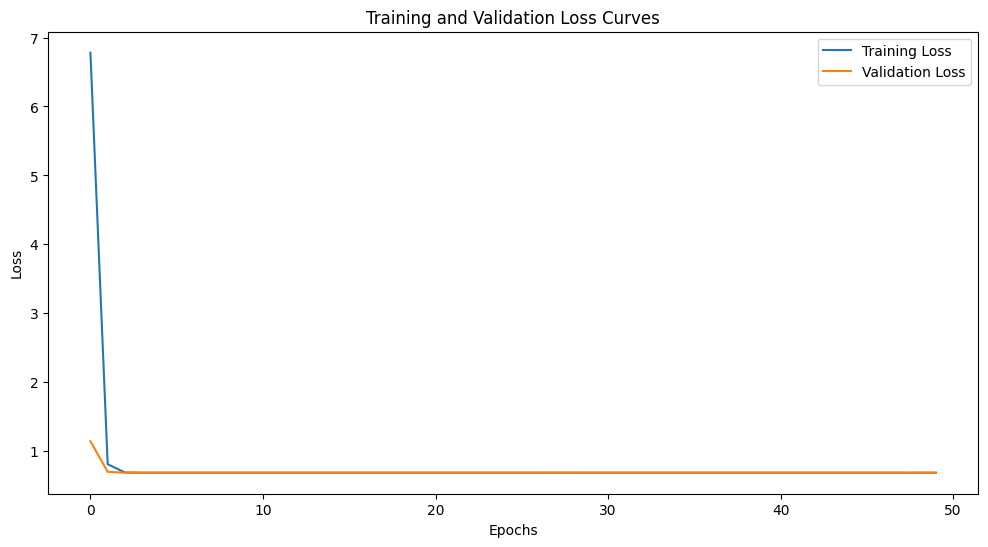

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()


In [ ]:

def compute_metrics(y_true, y_pred):
    if len(np.unique(y_true)) == 1:  # Only one class present in y_true
        print("Warning: Only one class present in y_true. Skipping AUC and AUPRC calculation.")
        return np.nan, np.nan

    y_pred = np.array(y_pred)
    y_true = np.array(y_true)

    try:
        auc = roc_auc_score(y_true, y_pred)
        auprc = average_precision_score(y_true, y_pred)
    except ValueError as e:
        print(f"Error calculating metrics: {e}")
        return np.nan, np.nan

    return auc, auprc

def compute_accuracy(y_true, y_pred):
    return accuracy_score(y_true, (y_pred > 0.5).astype(int))

In [ ]:

def compute_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    if len(np.unique(y_true)) == 1:  # Only one class present in y_true
        print("Warning: Only one class present in y_true. Skipping AUC and AUPRC calculation.")
        return np.nan, np.nan

    try:
        auc = roc_auc_score(y_true, y_pred)
        auprc = average_precision_score(y_true, y_pred)
    except ValueError as e:
        print(f"Error calculating metrics: {e}")
        return np.nan, np.nan

    return auc, auprc

def compute_accuracy(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    return accuracy_score(y_true, y_pred_binary)

num_tasks = 4
num_epochs = 200

train_loss_history = {t: [] for t in range(num_tasks)}
val_loss_history = {t: [] for t in range(num_tasks)}

# Assuming you have the train_dataset and val_dataset defined
for epoch in range(num_epochs):
    train_loss = {t: [] for t in range(num_tasks)}
    val_loss = {t: [] for t in range(num_tasks)}
    train_true = {t: [] for t in range(num_tasks)}
    train_pred = {t: [] for t in range(num_tasks)}
    val_true = {t: [] for t in range(num_tasks)}
    val_pred = {t: [] for t in range(num_tasks)}

    # Training loop
    for x_batch, y_batch, task_batch in train_dataset:
        with tf.GradientTape() as tape:
            outputs = model(x_batch, task_batch)
            loss = multitask_temporal_loss(y_batch, outputs, task_batch, model)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        for t in range(num_tasks):
            task_mask = (task_batch == t)
            if tf.reduce_sum(tf.cast(task_mask, tf.float32)) > 0:
                task_loss = multitask_temporal_loss(y_batch[task_mask], outputs[task_mask], task_batch[task_mask], model)
                train_loss[t].append(task_loss.numpy())
                train_true[t].extend(y_batch[task_mask].numpy().tolist())
                train_pred[t].extend(outputs[task_mask].numpy().tolist())

    # Validation loop
    for x_batch, y_batch, task_batch in val_dataset:
        outputs = model(x_batch, task_batch)
        loss = multitask_temporal_loss(y_batch, outputs, task_batch, model)

        for t in range(num_tasks):
            task_mask = (task_batch == t)
            if tf.reduce_sum(tf.cast(task_mask, tf.float32)) > 0:
                task_loss = multitask_temporal_loss(y_batch[task_mask], outputs[task_mask], task_batch[task_mask], model)
                val_loss[t].append(task_loss.numpy())
                val_true[t].extend(y_batch[task_mask].numpy().tolist())
                val_pred[t].extend(outputs[task_mask].numpy().tolist())

    for t in range(num_tasks):
        train_loss_history[t].append(np.mean(train_loss[t]))
        val_loss_history[t].append(np.mean(val_loss[t]))
        train_auc, train_auprc = compute_metrics(np.array(train_true[t]), np.array(train_pred[t]))
        val_auc, val_auprc = compute_metrics(np.array(val_true[t]), np.array(val_pred[t]))
        train_accuracy = compute_accuracy(np.array(train_true[t]), np.array(train_pred[t]))
        val_accuracy = compute_accuracy(np.array(val_true[t]), np.array(val_pred[t]))

        print(f'Week {t+1}: Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {train_loss_history[t][-1]:.4f} - Accuracy: {train_accuracy:.4f} - AUC: {train_auc:.4f} - AUPRC: {train_auprc:.4f}')
        print(f'Val Loss: {val_loss_history[t][-1]:.4f} - Accuracy: {val_accuracy:.4f} - AUC: {val_auc:.4f} - AUPRC: {val_auprc:.4f}')

plt.figure(figsize=(12, 8))
for t in range(num_tasks):
    plt.subplot(2, 2, t+1)
    plt.plot(train_loss_history[t], label=f'Training Loss Week {t+1}')
    plt.plot(val_loss_history[t], label=f'Validation Loss Week {t+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Week {t+1} Training and Validation Loss')
    plt.legend()
plt.tight_layout()
plt.show()


Error calculating metrics: multi_class must be in ('ovo', 'ovr')
Error calculating metrics: multi_class must be in ('ovo', 'ovr')


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [ ]:
plt.figure(figsize=(12, 8))
for t in range(num_tasks):
    plt.subplot(2, 2, t+1)
    plt.plot(train_loss_history[t], label=f'Training Loss Week {t+1}')
    plt.plot(val_loss_history[t], label=f'Validation Loss Week {t+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Week {t+1} Training and Validation Loss')
    plt.legend()
plt.tight_layout()
plt.show()

In [ ]:


def compute_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    if len(np.unique(y_true)) == 1:  # Only one class present in y_true
        print("Warning: Only one class present in y_true. Skipping AUC and AUPRC calculation.")
        return np.nan, np.nan

    try:
        auc = roc_auc_score(y_true, y_pred)
        auprc = average_precision_score(y_true, y_pred)
    except ValueError as e:
        print(f"Error calculating metrics: {e}")
        return np.nan, np.nan

    return auc, auprc

def compute_accuracy(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    return accuracy_score(y_true, y_pred_binary)

num_tasks = 4
num_epochs = 200

train_loss_history = {t: [] for t in range(num_tasks)}
val_loss_history = {t: [] for t in range(num_tasks)}

# Assuming you have the train_dataset and val_dataset defined
for epoch in range(num_epochs):
    train_loss = {t: [] for t in range(num_tasks)}
    val_loss = {t: [] for t in range(num_tasks)}
    train_true = {t: [] for t in range(num_tasks)}
    train_pred = {t: [] for t in range(num_tasks)}
    val_true = {t: [] for t in range(num_tasks)}
    val_pred = {t: [] for t in range(num_tasks)}

    # Training loop
    for x_batch, y_batch, task_batch in train_dataset:
        with tf.GradientTape() as tape:
            outputs = model(x_batch, task_batch)
            loss = multitask_temporal_loss(y_batch, outputs, task_batch, model)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        for t in range(num_tasks):
            task_mask = (task_batch == t)
            if tf.reduce_sum(tf.cast(task_mask, tf.float32)) > 0:
                task_loss = multitask_temporal_loss(y_batch[task_mask], outputs[task_mask], task_batch[task_mask], model)
                train_loss[t].append(task_loss.numpy())
                train_true[t].extend(y_batch[task_mask].numpy().tolist())
                train_pred[t].extend(outputs[task_mask].numpy().tolist())

    # Validation loop
    for x_batch, y_batch, task_batch in val_dataset:
        outputs = model(x_batch, task_batch)
        loss = multitask_temporal_loss(y_batch, outputs, task_batch, model)

        for t in range(num_tasks):
            task_mask = (task_batch == t)
            if tf.reduce_sum(tf.cast(task_mask, tf.float32)) > 0:
                task_loss = multitask_temporal_loss(y_batch[task_mask], outputs[task_mask], task_batch[task_mask], model)
                val_loss[t].append(task_loss.numpy())
                val_true[t].extend(y_batch[task_mask].numpy().tolist())
                val_pred[t].extend(outputs[task_mask].numpy().tolist())

    for t in range(num_tasks):
        train_loss_history[t].append(np.mean(train_loss[t]))
        val_loss_history[t].append(np.mean(val_loss[t]))

        train_auc, train_auprc = compute_metrics(train_true[t], train_pred[t])
        val_auc, val_auprc = compute_metrics(val_true[t], val_pred[t])

        train_accuracy = compute_accuracy(train_true[t], train_pred[t])
        val_accuracy = compute_accuracy(val_true[t], val_pred[t])

        print(f'Week {t+1}: Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {train_loss_history[t][-1]:.4f} - Accuracy: {train_accuracy:.4f} - AUC: {train_auc:.4f} - AUPRC: {train_auprc:.4f}')
        print(f'Val Loss: {val_loss_history[t][-1]:.4f} - Accuracy: {val_accuracy:.4f} - AUC: {val_auc:.4f} - AUPRC: {val_auprc:.4f}')




Error calculating metrics: multi_class must be in ('ovo', 'ovr')
Error calculating metrics: multi_class must be in ('ovo', 'ovr')


TypeError: '>' not supported between instances of 'list' and 'float'

In [ ]:
plt.figure(figsize=(12, 8))
for t in range(num_tasks):
    plt.subplot(2, 2, t+1)
    plt.plot(train_loss_history[t], label=f'Training Loss Week {t+1}')
    plt.plot(val_loss_history[t], label=f'Validation Loss Week {t+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Week {t+1} Training and Validation Loss')
    plt.legend()
plt.tight_layout()
plt.show()

In [ ]:

def compute_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    if len(np.unique(y_true)) == 1:  # Only one class present in y_true
        print("Warning: Only one class present in y_true. Skipping AUC and AUPRC calculation.")
        return np.nan, np.nan

    try:
        auc = roc_auc_score(y_true, y_pred)
        auprc = average_precision_score(y_true, y_pred)
    except ValueError as e:
        print(f"Error calculating metrics: {e}")
        return np.nan, np.nan

    return auc, auprc

def compute_accuracy(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_pred_binary = (y_pred > 0.5).astype(int)
    return accuracy_score(y_true, y_pred_binary)

num_tasks = 4
num_epochs = 200

train_loss_history = {t: [] for t in range(num_tasks)}
val_loss_history = {t: [] for t in range(num_tasks)}

# Assuming you have the train_dataset and val_dataset defined
for epoch in range(num_epochs):
    train_loss = {t: [] for t in range(num_tasks)}
    val_loss = {t: [] for t in range(num_tasks)}
    train_true = {t: [] for t in range(num_tasks)}
    train_pred = {t: [] for t in range(num_tasks)}
    val_true = {t: [] for t in range(num_tasks)}
    val_pred = {t: [] for t in range(num_tasks)}

    # Training loop
    for x_batch, y_batch, task_batch in train_dataset:
        with tf.GradientTape() as tape:
            outputs = model(x_batch, task_batch)
            loss = multitask_temporal_loss(y_batch, outputs, task_batch, model)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        for t in range(num_tasks):
            task_mask = (task_batch == t)
            if tf.reduce_sum(tf.cast(task_mask, tf.float32)) > 0:
                task_loss = multitask_temporal_loss(y_batch[task_mask], outputs[task_mask], task_batch[task_mask], model)
                train_loss[t].append(task_loss.numpy())
                train_true[t].extend(y_batch[task_mask].numpy().tolist())
                train_pred[t].extend(outputs[task_mask].numpy().tolist())

    # Validation loop
    for x_batch, y_batch, task_batch in val_dataset:
        outputs = model(x_batch, task_batch)
        loss = multitask_temporal_loss(y_batch, outputs, task_batch, model)

        for t in range(num_tasks):
            task_mask = (task_batch == t)
            if tf.reduce_sum(tf.cast(task_mask, tf.float32)) > 0:
                task_loss = multitask_temporal_loss(y_batch[task_mask], outputs[task_mask], task_batch[task_mask], model)
                val_loss[t].append(task_loss.numpy())
                val_true[t].extend(y_batch[task_mask].numpy().tolist())
                val_pred[t].extend(outputs[task_mask].numpy().tolist())

    for t in range(num_tasks):
        train_loss_history[t].append(np.mean(train_loss[t]))
        val_loss_history[t].append(np.mean(val_loss[t]))

        print(f"Debug: train_true[{t}] type: {type(train_true[t])} - length: {len(train_true[t])}")
        print(f"Debug: train_pred[{t}] type: {type(train_pred[t])} - length: {len(train_pred[t])}")

        train_auc, train_auprc = compute_metrics(train_true[t], train_pred[t])
        val_auc, val_auprc = compute_metrics(val_true[t], val_pred[t])

        train_accuracy = compute_accuracy(train_true[t], train_pred[t])
        val_accuracy = compute_accuracy(val_true[t], val_pred[t])

        print(f'Week {t+1}: Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {train_loss_history[t][-1]:.4f} - Accuracy: {train_accuracy:.4f} - AUC: {train_auc:.4f} - AUPRC: {train_auprc:.4f}')
        print(f'Val Loss: {val_loss_history[t][-1]:.4f} - Accuracy: {val_accuracy:.4f} - AUC: {val_auc:.4f} - AUPRC: {val_auprc:.4f}')




Debug: train_true[0] type: <class 'list'> - length: 10440
Debug: train_pred[0] type: <class 'list'> - length: 10440
Error calculating metrics: multi_class must be in ('ovo', 'ovr')
Error calculating metrics: multi_class must be in ('ovo', 'ovr')


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [ ]:
plt.figure(figsize=(12, 8))
for t in range(num_tasks):
    plt.subplot(2, 2, t+1)
    plt.plot(train_loss_history[t], label=f'Training Loss Week {t+1}')
    plt.plot(val_loss_history[t], label=f'Validation Loss Week {t+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Week {t+1} Training and Validation Loss')
    plt.legend()
plt.tight_layout()
plt.show()

In [ ]:

def compute_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    if len(np.unique(y_true)) == 1:  # Only one class present in y_true
        print("Warning: Only one class present in y_true. Skipping AUC and AUPRC calculation.")
        return np.nan, np.nan

    try:
        auc = roc_auc_score(y_true, y_pred)
        auprc = average_precision_score(y_true, y_pred)
    except ValueError as e:
        print(f"Error calculating metrics: {e}")
        return np.nan, np.nan

    return auc, auprc

def compute_accuracy(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_pred_binary = (y_pred > 0.5).astype(int)
    return accuracy_score(y_true, y_pred_binary)

num_tasks = 4
num_epochs = 200

train_loss_history = {t: [] for t in range(num_tasks)}
val_loss_history = {t: [] for t in range(num_tasks)}

# Assuming you have the train_dataset and val_dataset defined
for epoch in range(num_epochs):
    train_loss = {t: [] for t in range(num_tasks)}
    val_loss = {t: [] for t in range(num_tasks)}
    train_true = {t: [] for t in range(num_tasks)}
    train_pred = {t: [] for t in range(num_tasks)}
    val_true = {t: [] for t in range(num_tasks)}
    val_pred = {t: [] for t in range(num_tasks)}

    # Training loop
    for x_batch, y_batch, task_batch in train_dataset:
        with tf.GradientTape() as tape:
            outputs = model(x_batch, task_batch)
            loss = multitask_temporal_loss(y_batch, outputs, task_batch, model)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        for t in range(num_tasks):
            task_mask = (task_batch == t)
            if tf.reduce_sum(tf.cast(task_mask, tf.float32)) > 0:
                task_loss = multitask_temporal_loss(y_batch[task_mask], outputs[task_mask], task_batch[task_mask], model)
                train_loss[t].append(task_loss.numpy())
                train_true[t].extend(y_batch[task_mask].numpy().tolist())
                train_pred[t].extend(outputs[task_mask].numpy().tolist())

    # Validation loop
    for x_batch, y_batch, task_batch in val_dataset:
        outputs = model(x_batch, task_batch)
        loss = multitask_temporal_loss(y_batch, outputs, task_batch, model)

        for t in range(num_tasks):
            task_mask = (task_batch == t)
            if tf.reduce_sum(tf.cast(task_mask, tf.float32)) > 0:
                task_loss = multitask_temporal_loss(y_batch[task_mask], outputs[task_mask], task_batch[task_mask], model)
                val_loss[t].append(task_loss.numpy())
                val_true[t].extend(y_batch[task_mask].numpy().tolist())
                val_pred[t].extend(outputs[task_mask].numpy().tolist())

    for t in range(num_tasks):
        train_loss_history[t].append(np.mean(train_loss[t]))
        val_loss_history[t].append(np.mean(val_loss[t]))

        print(f"Debug: train_true[{t}] type: {type(train_true[t])} - length: {len(train_true[t])}")
        print(f"Debug: train_pred[{t}] type: {type(train_pred[t])} - length: {len(train_pred[t])}")

        train_auc, train_auprc = compute_metrics(train_true[t], train_pred[t])
        val_auc, val_auprc = compute_metrics(val_true[t], val_pred[t])

        train_accuracy = compute_accuracy(train_true[t], train_pred[t])
        val_accuracy = compute_accuracy(val_true[t], val_pred[t])

        print(f'Week {t+1}: Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {train_loss_history[t][-1]:.4f} - Accuracy: {train_accuracy:.4f} - AUC: {train_auc:.4f} - AUPRC: {train_auprc:.4f}')
        print(f'Val Loss: {val_loss_history[t][-1]:.4f} - Accuracy: {val_accuracy:.4f} - AUC: {val_auc:.4f} - AUPRC: {val_auprc:.4f}')




Debug: train_true[0] type: <class 'list'> - length: 10440
Debug: train_pred[0] type: <class 'list'> - length: 10440
Error calculating metrics: multi_class must be in ('ovo', 'ovr')
Error calculating metrics: multi_class must be in ('ovo', 'ovr')


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [ ]:
plt.figure(figsize=(12, 8))
for t in range(num_tasks):
    plt.subplot(2, 2, t+1)
    plt.plot(train_loss_history[t], label=f'Training Loss Week {t+1}')
    plt.plot(val_loss_history[t], label=f'Validation Loss Week {t+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Week {t+1} Training and Validation Loss')
    plt.legend()
plt.tight_layout()
plt.show()

In [ ]:


def compute_metrics(y_true, y_pred):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()

    if len(np.unique(y_true)) == 1:  # Only one class present in y_true
        print("Warning: Only one class present in y_true. Skipping AUC and AUPRC calculation.")
        return np.nan, np.nan

    try:
        auc = roc_auc_score(y_true, y_pred)
        auprc = average_precision_score(y_true, y_pred)
    except ValueError as e:
        print(f"Error calculating metrics: {e}")
        return np.nan, np.nan

    return auc, auprc

def compute_accuracy(y_true, y_pred):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    y_pred_binary = (y_pred > 0.5).astype(int)
    return accuracy_score(y_true, y_pred_binary)

num_tasks = 4
num_epochs = 200

train_loss_history = {t: [] for t in range(num_tasks)}
val_loss_history = {t: [] for t in range(num_tasks)}

# Assuming you have the train_dataset and val_dataset defined
for epoch in range(num_epochs):
    train_loss = {t: [] for t in range(num_tasks)}
    val_loss = {t: [] for t in range(num_tasks)}
    train_true = {t: [] for t in range(num_tasks)}
    train_pred = {t: [] for t in range(num_tasks)}
    val_true = {t: [] for t in range(num_tasks)}
    val_pred = {t: [] for t in range(num_tasks)}

    # Training loop
    for x_batch, y_batch, task_batch in train_dataset:
        with tf.GradientTape() as tape:
            outputs = model(x_batch, task_batch)
            loss = multitask_temporal_loss(y_batch, outputs, task_batch, model)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        for t in range(num_tasks):
            task_mask = (task_batch == t)
            if tf.reduce_sum(tf.cast(task_mask, tf.float32)) > 0:
                task_loss = multitask_temporal_loss(y_batch[task_mask], outputs[task_mask], task_batch[task_mask], model)
                train_loss[t].append(task_loss.numpy())
                train_true[t].extend(y_batch[task_mask].numpy().tolist())
                train_pred[t].extend(outputs[task_mask].numpy().tolist())

    # Validation loop
    for x_batch, y_batch, task_batch in val_dataset:
        outputs = model(x_batch, task_batch)
        loss = multitask_temporal_loss(y_batch, outputs, task_batch, model)

        for t in range(num_tasks):
            task_mask = (task_batch == t)
            if tf.reduce_sum(tf.cast(task_mask, tf.float32)) > 0:
                task_loss = multitask_temporal_loss(y_batch[task_mask], outputs[task_mask], task_batch[task_mask], model)
                val_loss[t].append(task_loss.numpy())
                val_true[t].extend(y_batch[task_mask].numpy().tolist())
                val_pred[t].extend(outputs[task_mask].numpy().tolist())

    for t in range(num_tasks):
        train_loss_history[t].append(np.mean(train_loss[t]))
        val_loss_history[t].append(np.mean(val_loss[t]))

        print(f"Debug: train_true[{t}] type: {type(train_true[t])} - length: {len(train_true[t])}")
        print(f"Debug: train_pred[{t}] type: {type(train_pred[t])} - length: {len(train_pred[t])}")

        try:
            train_auc, train_auprc = compute_metrics(train_true[t], train_pred[t])
            val_auc, val_auprc = compute_metrics(val_true[t], val_pred[t])
            train_accuracy = compute_accuracy(train_true[t], train_pred[t])
            val_accuracy = compute_accuracy(val_true[t], val_pred[t])
        except ValueError as e:
            print(f"Error calculating metrics: {e}")
            train_auc, train_auprc, train_accuracy = np.nan, np.nan, np.nan
            val_auc, val_auprc, val_accuracy = np.nan, np.nan, np.nan

        print(f'Week {t+1}: Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {train_loss_history[t][-1]:.4f} - Accuracy: {train_accuracy:.4f} - AUC: {train_auc:.4f} - AUPRC: {train_auprc:.4f}')
        print(f'Val Loss: {val_loss_history[t][-1]:.4f} - Accuracy: {val_accuracy:.4f} - AUC: {val_auc:.4f} - AUPRC: {val_auprc:.4f}')




Debug: train_true[0] type: <class 'list'> - length: 10440
Debug: train_pred[0] type: <class 'list'> - length: 10440
Error calculating metrics: Found input variables with inconsistent numbers of samples: [10440, 41760]
Error calculating metrics: Found input variables with inconsistent numbers of samples: [2597, 10388]
Error calculating metrics: Found input variables with inconsistent numbers of samples: [10440, 41760]
Week 1: Epoch 1/200
Train Loss: 0.6948 - Accuracy: nan - AUC: nan - AUPRC: nan
Val Loss: 0.6954 - Accuracy: nan - AUC: nan - AUPRC: nan
Debug: train_true[1] type: <class 'list'> - length: 6617
Debug: train_pred[1] type: <class 'list'> - length: 6617
Error calculating metrics: Found input variables with inconsistent numbers of samples: [6617, 26468]
Error calculating metrics: Found input variables with inconsistent numbers of samples: [1610, 6440]
Error calculating metrics: Found input variables with inconsistent numbers of samples: [6617, 26468]
Week 2: Epoch 1/200
Train L

In [ ]:
plt.figure(figsize=(12, 8))
for t in range(num_tasks):
    plt.subplot(2, 2, t+1)
    plt.plot(train_loss_history[t], label=f'Training Loss Week {t+1}')
    plt.plot(val_loss_history[t], label=f'Validation Loss Week {t+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Week {t+1} Training and Validation Loss')
    plt.legend()
plt.tight_layout()
plt.show()